# ANHA4 Barium simulation results

* Spin-up 8 years (2002-2005)*2
* ANHA4-EXH005
* 2002/01/01 - 2013/12/31 (144 months)
* Latest riverine tracer source file

In [1]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import numpy as np
#import seaborn as sb
import netCDF4 as nc
import cartopy.feature
import cartopy.crs as ccrs # ccrs
#import NEMO_tools as Nts
import matplotlib.pyplot as plt
import matplotlib.text as text
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [3]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue

In [4]:
Mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [5]:
def seasonal_cycle(data):
    out = np.empty([12, np.size(data, 1), np.size(data, 2)])
    for mon in range(12):
        out[mon, :, :] = np.nanmean(data[mon:len(data):12, :, :], 0)
    return out
def seasonal_decomp3d(data):
    anom = np.empty(data.shape)
    for mon in range(12):
        temp_data = np.nanmean(data[mon:len(data):12, :, :], 0)
        anom[mon:len(data):12, :, :] = data[mon:len(data):12, :, :]-temp_data
    return anom

In [7]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/BASE01_1m_20020101_20131231_ptrc_T.nc'

In [12]:
ptrc_obj = nc.Dataset(FName)
Ba = np.squeeze(ptrc_obj.variables['Ba'][:, :20, :, :])
Ba[Ba==0]=np.nan
Ba = np.nanmean(Ba, 1)
#d18O = np.squeeze(ptrc_obj.variables['d18O'][:, 0, :, :])
nav_lat = ptrc_obj.variables['nav_lat'][:]
nav_lon = ptrc_obj.variables['nav_lon'][:]
deptht = ptrc_obj.variables['deptht'][:]

/home/yingkai/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [10]:
ptrc_obj = nc.Dataset(FName)
Ba = np.squeeze(ptrc_obj.variables['Ba'][:, :24, :, :])
d18O = np.squeeze(ptrc_obj.variables['d18O'][:, :24, :, :])
d18O[Ba==0]=np.nan
Ba[Ba==0]=np.nan
Ba = np.nanmean(Ba, 1)
d18O = np.nanmean(d18O, 1)
#d18O = np.squeeze(ptrc_obj.variables['d18O'][:, 0, :, :])
nav_lat = ptrc_obj.variables['nav_lat'][:]
nav_lon = ptrc_obj.variables['nav_lon'][:]
deptht = ptrc_obj.variables['deptht'][:]

MemoryError: 

In [13]:
FS_Ba = Ba[:, 520, 325]
BS_Ba = Ba[:, 780, 231]
MK_Ba = Ba[:, 708, 149]
LN_Ba = Ba[:, 730, 390]
Ob_Ba = Ba[:, 617, 448]
CA_Ba = Ba[:, 680, 250]
CAA_Ba = Ba[:, 610, 150]

In [14]:
Ba[Ba==0]=np.nan;
Ba_anom = seasonal_decomp3d(Ba)
Ba_monmean = seasonal_cycle(Ba)

In [15]:
from dateutil.relativedelta import relativedelta

base = datetime.datetime(2001, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(168)]

# Mean timeseries

In [16]:
import matplotlib.patches as mpatches

In [17]:
#sb.set_style('white')

In [113]:
lev1 = np.arange(40, 92, 4)
lev2 = np.array([-3.25, -2.25, -1.25, -0.25, 0.25, 1.25, 2.25, 3.25])
#lev2 = np.array([-9, -7, -5, -3, -1, 1, 3, 5, 7, 9])/10.0

In [19]:
def draw_Ba(nav_lon, nav_lat, Ba, lev, ax, cmap=cm.GMT_haxby_r):
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, Ba, lev, cmap=cmap, extend='both')
    proj.contour(x, y, Ba, lev, linewidths=0.5, colors=('gray',))
    return CS

In [20]:
Ba.shape

(144, 800, 544)

In [21]:
Ba_t = np.nanmean(np.nanmean(Ba, 1), 1)

Ba_stack = np.reshape(Ba_t, [12, 12])
Ba_stack_min = np.min(Ba_stack, 0)
Ba_stack_mean = np.mean(Ba_stack, 0)
Ba_stack_max = np.max(Ba_stack, 0)
fake_x = range(1, 13)

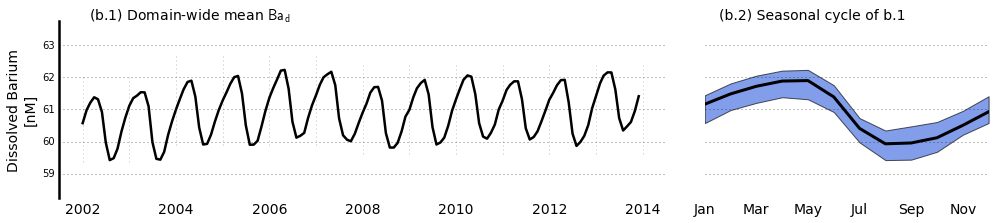

In [108]:
fig = plt.figure(figsize=(13.6, 3))

ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2, rowspan=1)
ax2 = plt.subplot2grid((1, 3), (0, 2), colspan=1, rowspan=1)
fig.tight_layout()
fig.subplots_adjust(hspace=0.01)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(linestyle=':')
    AX[i].xaxis.grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].xaxis.set_tick_params(labelsize=14)
    [j.set_linewidth(2.5) for j in AX[i].spines.itervalues()]
    
ax1.set_yticks(np.arange(57, 66, 1)); ax1.set_ylim([58.25, 63.75])
ax1.set_ylabel('Dissolved Barium\n[nM]', fontsize=14)
ax1.set_xlim([date_list[6], date_list[-6]])
ax1.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")


for i in [12, 24, ]:
    ax1.axvline(date_list[i], ymin=0.2, ymax=0.7, lw=0.5, ls=':', color='gray')
for i in [84, 96, 108, 120, 132, 144, 156]:
    ax1.axvline(date_list[i], ymin=0.25, ymax=0.75, lw=0.5, ls=':', color='gray')
for i in [36, 48, 60, 72]:
    ax1.axvline(date_list[i], ymin=0.3, ymax=0.8, lw=0.5, ls=':', color='gray')    
    
ax2.spines["left"].set_visible(False)
ax2.set_yticks(np.arange(57, 66, 1)); ax2.set_ylim([58.25, 63.75])
ax2.set_xlim([1, 12]); ax2.set_xticks(fake_x[::2]); ax2.set_xticklabels(Mon[::2])
ax2.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="off")

#patch = mpatches.Patch(color=RB, alpha=0.65, label="muti-year min/max")
#legend_handle = plt.legend(handles=[patch], bbox_to_anchor=(1.05, 1), frameon=False, prop={'size':12})
#ax2.add_artist(legend_handle)


ax1.plot(date_list[12:-12], Ba_t, '-', color='k', lw=2.5)
ax1.set_title('(b.1) Domain-wide mean $\mathsf{Ba_d}$', x=0.05, y=0.98, loc='left', fontsize=14)
ax2.fill_between(fake_x, Ba_stack_min, Ba_stack_max, facecolor=RB, edgecolor=None, interpolate=True, alpha=0.65)
ax2.plot(fake_x, Ba_stack_mean, color='k', lw=3)
ax2.set_title('(b.2) Seasonal cycle of b.1', x=0.05, y=0.98, loc='left', fontsize=14)

fig.savefig('../../Bad_Part2.png', dpi=300, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

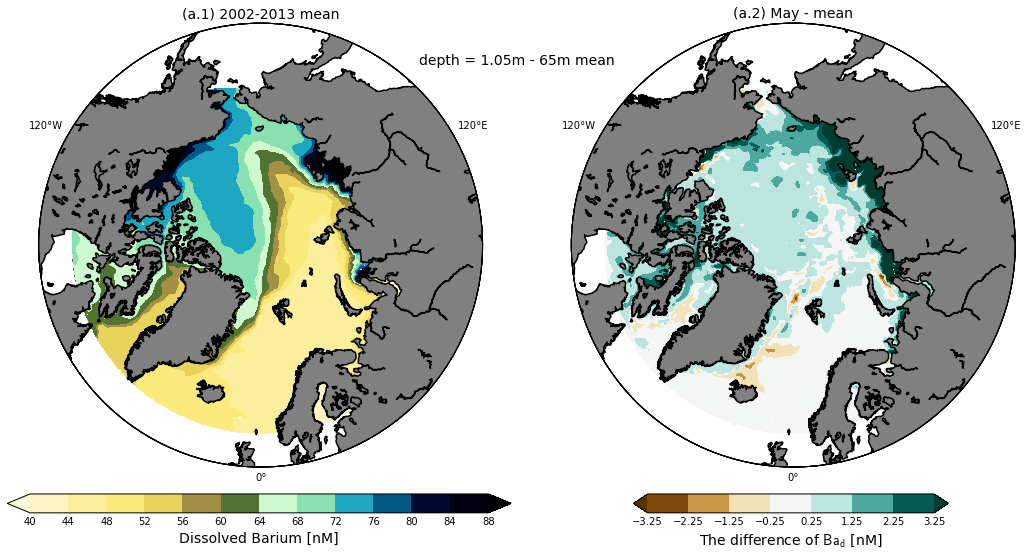

In [134]:
fig=plt.figure(figsize=(17.5, 17.5));

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
#ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=0, round=True, ax=ax1)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS1=proj.contourf(x, y, np.nanmean(Ba_monmean, 0), lev1, cmap=cm.GMT_relief_r, extend='both')
ax1.set_title('(a.1) 2002-2013 mean', fontsize=14)


proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=0, round=True, ax=ax2)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS2=proj.contourf(x, y, Ba_monmean[4, :, :]-np.nanmean(Ba_monmean, 0), lev2, cmap=plt.cm.BrBG, extend='both')
ax2.set_title('(a.2) May - mean', fontsize=14)

cax = fig.add_axes([0.1, 0.3, 0.4, 0.015])
CBar = fig.colorbar(CS1, cax=cax, orientation='horizontal')
CBar.set_label('Dissolved Barium [nM]', fontsize=14)
CBar.ax.tick_params(axis='x', length=0)
CBar.set_ticks(lev1)

cax = fig.add_axes([0.597, 0.3, 0.25, 0.015])
CBar = fig.colorbar(CS2, cax=cax, orientation='horizontal')
CBar.set_label('The difference of $\mathsf{Ba_d}$ [nM]', fontsize=14)
CBar.ax.tick_params(axis='x', length=0)
CBar.set_ticks(lev2)

ax1.text(8.65e6, 7.35e6, 'depth = 1.05m - 65m mean',
        horizontalalignment='center',
        verticalalignment='center', fontsize=14)
        #transform=ax1.transAxes)

fig.savefig('../../Bad_Part1.png', dpi=300, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

# Variations at key locations

In [20]:
Ba_mean = np.nanmean(Ba, 0)
#d18O_mean = np.nanmean(d18O, 0)

In [21]:
locx = [520, 780, 708, 730, 617, 680, 610]
locy = [325, 231, 149, 390, 448, 250, 150]
syms = ['yD', 'y^', 'y*', 'yo', 'y<', 'y>', 'yv']
labels = ['Fram Strait', 'Bering Strait', 'Mackenzie', 'Lena', 'Ob', 'Central Arctic', 'CAA']

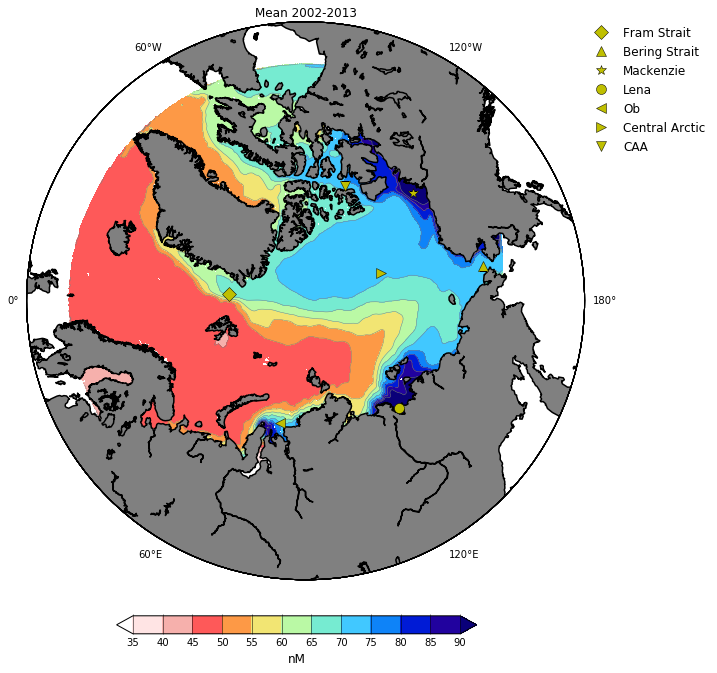

In [22]:
fig=plt.figure(figsize=(10, 10));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, Ba_mean, lev1, cmap=cm.GMT_haxby_r, extend='both')
proj.contour(x, y, Ba_mean, lev1, linewidths=0.5, colors=('gray',))
for i in range(7):
    proj.plot(x[locx[i], locy[i]], y[locx[i], locy[i]], syms[i], ms=10, label=labels[i])
ax.set_title('Mean 2002-2013', fontsize=12)
LG = ax.legend(numpoints=1, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)

cax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=20)
CBar.set_ticks(lev1)

#fig.savefig('seminar9.1.png', dpi=300, orientation='portrait', papertype='a4', format='png',
#                bbox_inches='tight', pad_inches=0.1)

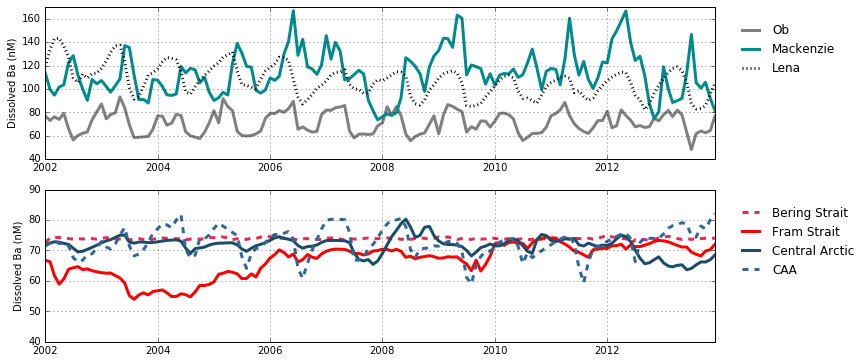

In [23]:
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
ax1.grid(); ax2.grid()

ax1.plot(date_list[12:-12], Ob_Ba, 'k-', color='gray', lw=3, label='Ob')
ax1.plot(date_list[12:-12], MK_Ba, 'k-', color=DC, lw=3, label='Mackenzie')
ax1.plot(date_list[12:-12], LN_Ba, 'k:', lw=3, label='Lena')
#ax1.plot(date_list[50], Ob_Ba[38], 'ro', lw=3, label='Lena')
ax1.set_ylim(40, 170)
ax1.set_ylabel('Dissolved Ba (nM)')
LG=ax1.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 

ax2.plot(date_list[12:-12], BS_Ba, 'k--', color=AM, lw=3, label='Bering Strait')
ax2.plot(date_list[12:-12], FS_Ba, 'k-', color='r', lw=3, label='Fram Strait')
ax2.plot(date_list[12:-12], CA_Ba, 'k-', color=[0.1, 0.3, 0.4], lw=3, label='Central Arctic')
ax2.plot(date_list[12:-12], CAA_Ba, 'k--', color=[0.2, 0.4, 0.6], lw=3, label='CAA')
ax2.set_ylim(40, 90)
ax2.set_ylabel('Dissolved Ba (nM)')
LG=ax2.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1); LG.draw_frame(False)

#fig.savefig('seminar9.3.png', dpi=300, orientation='portrait', papertype='a4', format='png',
#                bbox_inches='tight', pad_inches=0.1)